Fizyka Kwanty z Pythonem

In [25]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

sp.init_printing()

Spotkanie 1

In [26]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True, positive = True)
a = sp.Symbol('a', real = True)
n = sp.Symbol('n', integer = True, nonzero=True)
m = sp.Symbol('m', real = True, positive = True)
h = sp.Symbol('hbar', real=True, positive = True)
t = sp.Symbol('t', real = True, positive = True)
psi = sp.Function('\psi')

x, k, a, psi(x), n, m, h, t

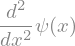

In [27]:
psi(x).diff(x, x)

In [28]:
-k**2 * psi(x)

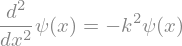

In [29]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [30]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
sol

In [31]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
sol

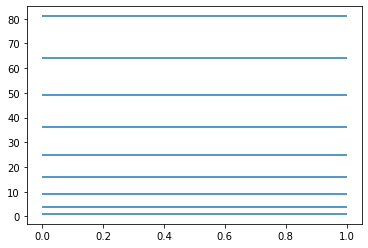

In [32]:
plt.hlines(np.arange(1,10)**2, 0, 1)

Spotkanie 2

In [33]:
sp.pi.evalf(100)

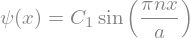

In [34]:
sol = sol.subs(k, n * sp.pi / a)
sol

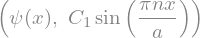

In [35]:
sol.lhs, sol.rhs

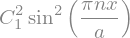

In [36]:
sol.rhs**2

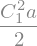

In [37]:
sp.integrate(sol.rhs**2, (x, 0, a))

In [38]:
sp.Symbol('C1')

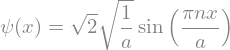

In [39]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

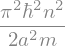

In [40]:
E = n**2 * sp.pi**2 * h**2 / (2 * m * a**2)
E  

In [41]:
phi = sp.exp(-sp.I * E * t / h)
phi

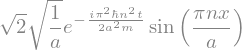

In [42]:
Psi = sol.rhs * phi
Psi

In [43]:
Psi.subs({a: 1, h: 1, m: 1})

In [44]:
Psif = lambdify((x, t, n), Psi.subs({a: 1, h: 1, m: 1}))

In [45]:
Psif(0.3, 0.2, 1), Psif(0.3, 0.2, 1).real, Psif(0.3, 0.2, 1).imag

((0.6306730671332264-0.9546038323659279j),
 0.6306730671332264,
 -0.9546038323659279)

In [46]:
type(Psif(0.3, 0, 1))

numpy.complex128

In [47]:
xs = np.linspace(0, 1, 100)
Psif(xs, 0.2, 1)

array([0.00000000e+00+0.00000000e+00j, 2.47336623e-02-3.74375410e-02j,
       4.94424199e-02-7.48373856e-02j, 7.41013932e-02-1.12161875e-01j,
       9.86857526e-02-1.49373427e-01j, 1.23170744e-01-1.86434573e-01j,
       1.47531713e-01-2.23307995e-01j, 1.71744129e-01-2.59956565e-01j,
       1.95783615e-01-2.96343381e-01j, 2.19625962e-01-3.32431803e-01j,
       2.43247165e-01-3.68185496e-01j, 2.66623438e-01-4.03568456e-01j,
       2.89731245e-01-4.38545058e-01j, 3.12547316e-01-4.73080081e-01j,
       3.35048679e-01-5.07138754e-01j, 3.57212677e-01-5.40686780e-01j,
       3.79016991e-01-5.73690381e-01j, 4.00439667e-01-6.06116324e-01j,
       4.21459135e-01-6.37931959e-01j, 4.42054229e-01-6.69105251e-01j,
       4.62204212e-01-6.99604811e-01j, 4.81888794e-01-7.29399928e-01j,
       5.01088155e-01-7.58460601e-01j, 5.19782963e-01-7.86757568e-01j,
       5.37954394e-01-8.14262338e-01j, 5.55584150e-01-8.40947214e-01j,
       5.72654480e-01-8.66785327e-01j, 5.89148195e-01-8.91750662e-01j,
      

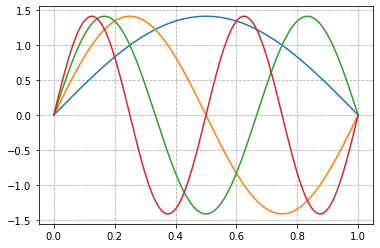

In [48]:
xs = np.linspace(0, 1, 1000)

plt.grid(linestyle = '--')

plt.plot(xs, Psif(xs, 0, 1).real)
plt.plot(xs, Psif(xs, 0, 2).real)
plt.plot(xs, Psif(xs, 0, 3).real)
plt.plot(xs, Psif(xs, 0, 4).real)

In [49]:
n = 5

xs = np.linspace(0, 1, 1000)

fig = plt.figure()
plt.grid(linestyle = '--')

plot1, = plt.plot([],[])
plot2, = plt.plot([],[])

plt.xlim(0, 1)
plt.ylim(-1.5,1.5)

plt.close()

dt = 0.001

def frame(i):
  t = i * dt
  ys = Psif(xs, t, n)

  plot1.set_data(xs, ys.real)
  plot2.set_data(xs, ys.imag)

  return plot1, plot2

# anim = FuncAnimation(fig, frame, 300, interval = 20, blit = True)
# HTML(anim.to_jshtml())

In [50]:
n = 3

xs = np.linspace(0, 1, 1000)

fig = plt.figure()
plt.grid(linestyle = '--')

plot1, = plt.plot([],[])

plt.xlim(0, 1)
plt.ylim(-1.5,1.5)

plt.close()

dt = 0.001

def frame(i):
  t = i * dt

  ys = Psif(xs, t, n)
  ys1 = np.abs(ys)**2

  plot1.set_data(xs, ys1)

  return plot1,

# anim = FuncAnimation(fig, frame, 300, interval = 20, blit = True)
# HTML(anim.to_jshtml())

In [51]:
xs = np.linspace(0, 1, 1000)

fig = plt.figure()
plt.grid(linestyle = '--')

plot1, = plt.plot([],[])

plt.xlim(0, 1)
plt.ylim(0,3)

plt.close()

dt = 0.001

def frame(i):
  t = i * dt

  ys = (Psif(xs, t, 1) + Psif(xs, t, 2) + Psif(xs, t, 3)) / (np.sqrt(3))
  ys1 = np.abs(ys)**2

  plot1.set_data(xs, ys1)

  return plot1,

# anim = FuncAnimation(fig, frame, 300, interval = 20, blit = True)
# HTML(anim.to_jshtml())

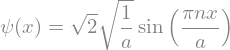

In [52]:
sol

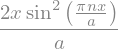

In [53]:
sol.rhs * x * sol.rhs

In [54]:
sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()

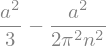

In [55]:
sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()

Zadanie Zajęcia Zintegrowane

//Policzyć średni pęd i średni kwadrat pędu//

< p >=?

< p<sup>2</sup> >=?

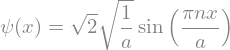

In [56]:
sol

In [58]:
p = -sp.I * h
p

Średni pęd < p >

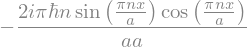

In [59]:
f1 = sol.rhs * p * sol.rhs.diff(x)
f1

In [60]:
sp.integrate(f1, (x, 0, a)).simplify()

Średnia kwadratu pędu < p<sup>2</sup> >

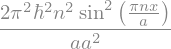

In [61]:
f2 = sol.rhs * p**2 * sol.rhs.diff(x, x)
f2

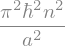

In [62]:
sp.integrate(f2, (x, 0, a)).simplify()